<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_2018.csv to dataset_2018.csv


In [2]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [4]:
asd_2018_df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'ASD_Traits'],
      dtype='object')

In [6]:
mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score'],axis=1)
mixed_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD_Traits'],
      dtype='object')

In [26]:
females = mixed_df.copy()


female_df = females[females['Sex']=='f']

female_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      0 non-null      int64  
 1   A2                      0 non-null      int64  
 2   A3                      0 non-null      int64  
 3   A4                      0 non-null      int64  
 4   A5                      0 non-null      int64  
 5   A6                      0 non-null      int64  
 6   A7                      0 non-null      int64  
 7   A8                      0 non-null      int64  
 8   A9                      0 non-null      int64  
 9   A10                     0 non-null      int64  
 10  Age_Mons                0 non-null      float64
 11  Sex                     0 non-null      float64
 12  Ethnicity               0 non-null      float64
 13  Jaundice                0 non-null      float64
 14  Family_mem_with_ASD     0 non-null      float64
 15  W

In [16]:
# mixed_corr = mixed_df.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(mixed_corr, annot=True, square=True)
# plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex', 'Jaundice', 'Family_mem_with_ASD','Who completed the test', 'Ethnicity']
target = ['ASD_Traits']

mixed_df['Age_Mons'] = scaler.fit_transform(mixed_df['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    mixed_df[c] = encoder.fit_transform(mixed_df[c].values.reshape(-1,1)).toarray()
mixed_df.dtypes
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,1,1,1,1,1,1,1,-0.484817,0.0,1.0,1.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,-0.986286,1.0,0.0,1.0,0.0,0.0,0.0


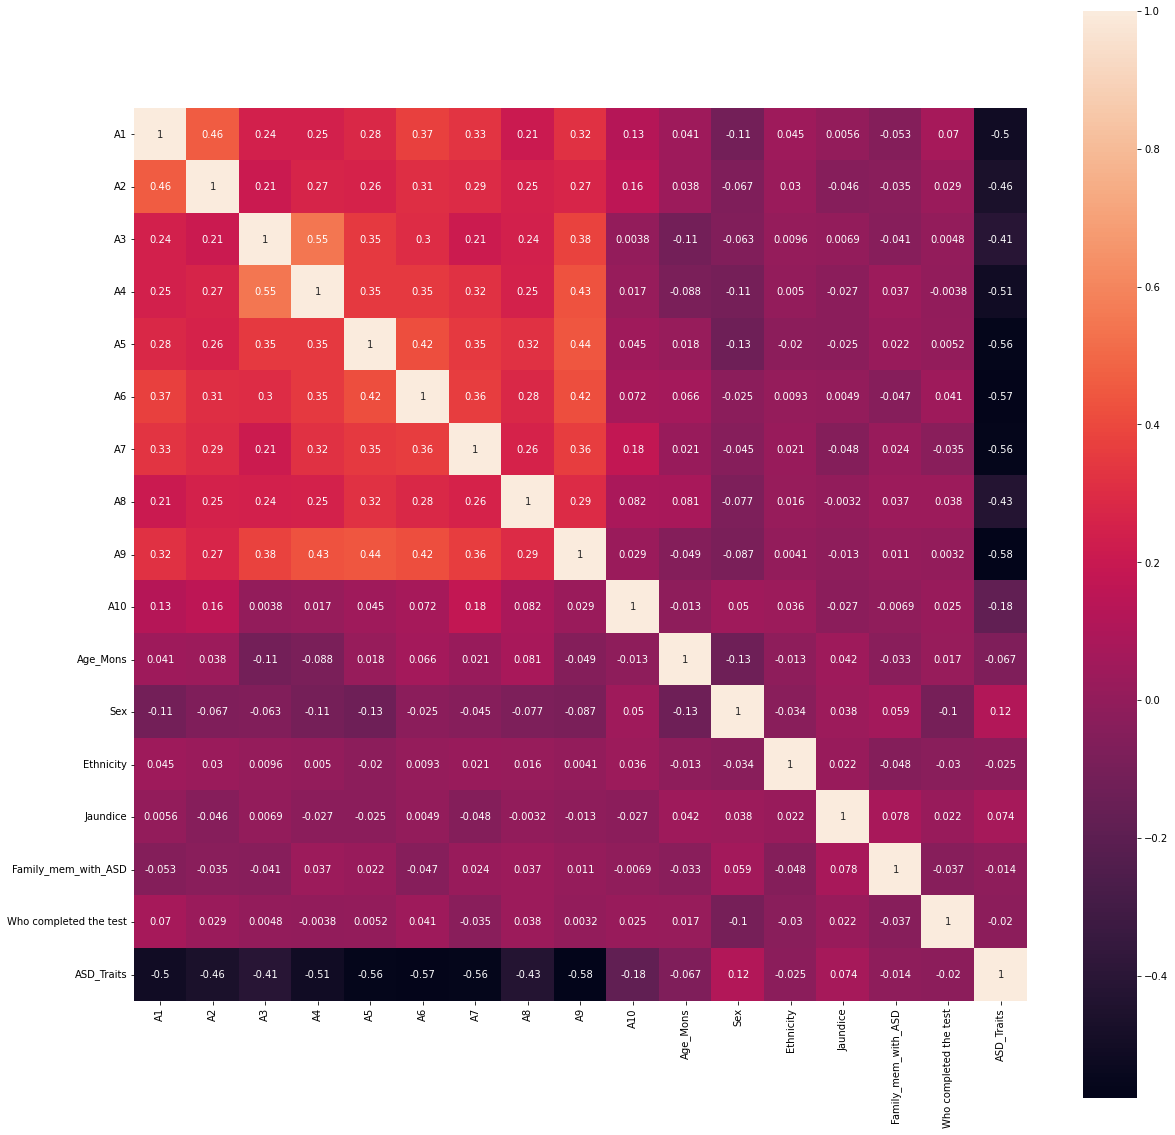

In [19]:
mixed_corr = mixed_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(mixed_corr, annot=True, square=True)
plt.show()

In [20]:
female_df['Age_Mons'] = scaler.fit_transform(female_df['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    female_df[c] = encoder.fit_transform(female_df[c].values.reshape(-1,1)).toarray()
female_df.dtypes
female_df.head()

<ipython-input-20-886d0a9d78ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Age_Mons'] = scaler.fit_transform(female_df['Age_Mons'].values.reshape(-1,1))
<ipython-input-20-886d0a9d78ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df[c] = encoder.fit_transform(female_df[c].values.reshape(-1,1)).toarray()
<ipython-input-20-886d0a9d78ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.197673,1.0,0.0,0.0,1.0,0.0,1.0
4,1,1,0,1,1,1,1,1,1,1,-0.736515,1.0,0.0,1.0,0.0,0.0,0.0
12,0,0,0,0,0,0,0,0,0,0,-0.152647,1.0,0.0,0.0,1.0,0.0,1.0
13,1,1,1,1,0,0,1,0,1,1,-1.320382,1.0,0.0,0.0,1.0,0.0,0.0
17,1,1,1,0,1,1,1,1,0,1,-1.670702,1.0,0.0,0.0,1.0,0.0,0.0
